# **PCA Implementation**

In [46]:
import numpy as np
import pandas as pd

In [47]:
data=np.array([[3,7],[-4,-6],[1,-1],[7,8],[-4,-1],[-3,-7]])

In [48]:
df=pd.DataFrame(data,columns=['x1','x2'])

In [49]:
df

x1  x2
0   3   7
1  -4  -6
2   1  -1
3   7   8
4  -4  -1
5  -3  -7

In [50]:
df.describe()

x1        x2
count  6.000000  6.000000
mean   0.000000  0.000000
std    4.472136  6.324555
min   -4.000000 -7.000000
25%   -3.750000 -4.750000
50%   -1.000000 -1.000000
75%    2.500000  5.000000
max    7.000000  8.000000

In [51]:
# make the data in standard normal form
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [52]:
scaled_data

array([[ 0.73484692,  1.21243557],
       [-0.9797959 , -1.03923048],
       [ 0.24494897, -0.17320508],
       [ 1.71464282,  1.38564065],
       [-0.9797959 , -0.17320508],
       [-0.73484692, -1.21243557]])

In [53]:
df=pd.DataFrame(scaled_data,columns=['x1','x2'])

In [54]:
df.describe()

x1        x2
count  6.000000e+00  6.000000
mean   1.850372e-17  0.000000
std    1.095445e+00  1.095445
min   -9.797959e-01 -1.212436
25%   -9.185587e-01 -0.822724
50%   -2.449490e-01 -0.173205
75%    6.123724e-01  0.866025
max    1.714643e+00  1.385641

In [55]:
# make the covariance matrix

df.cov()

x1       x2
x1  1.20000  1.06066
x2  1.06066  1.20000

In [56]:
# another way
c1=df.x1
c2=df.x2
np.cov(c1,c2)

array([[1.2       , 1.06066017],
       [1.06066017, 1.2       ]])

In [57]:
# Evaluate the eigen value and eigen vector of the cov matrix

eigen_values,eigen_vectors=np.linalg.eig(df.cov())

In [58]:
# eigenvalues--> features
eigen_values # Gives the strength of the information given by eigen vector

array([2.26066017, 0.13933983])

In [59]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [60]:
# take the eigen vectors which have highest eigen value to create PCs

eigen_vectors[:,0] # consider the 1st column of eigen vactor, this has highest eigen value (2.26066)

array([0.70710678, 0.70710678])

In [61]:
df

x1        x2
0  0.734847  1.212436
1 -0.979796 -1.039230
2  0.244949 -0.173205
3  1.714643  1.385641
4 -0.979796 -0.173205
5 -0.734847 -1.212436

In [62]:
PC1=df @ eigen_vectors[:,0] # multiply df with 1st eigen vector

In [63]:
PC1 # 2D data (x1,x2) to 1D data (PC1)

0    1.376937
1   -1.427667
2    0.050731
3    2.192231
4   -0.815295
5   -1.376937
dtype: float64

In [64]:
# similarly if we want PC2, consider the 2nd column

In [65]:
# How to determine the number of PCs

In [66]:
# 1st method
# all the PCs together  should  have variance above 80% to capture most of the data

# we can check the variance of PC1

from sklearn.decomposition import PCA
# Explained variance ratio for PC1
explained_variance_pc1 = eigen_values[0] / np.sum(eigen_values) * 100
print(f"Variance explained by PC1: {explained_variance_pc1}%")

Variance explained by PC1: 94.19417382415922%


In [67]:
# we can directly get the PCs by using PCA library

from sklearn.decomposition import PCA

# Example data with two features
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2.0, 1.6],
                 [1.0, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Apply PCA and keep one component (PC1)
pca = PCA(n_components=1) # only PC1
pca.fit(data)

# Explained variance ratio for PC1
explained_variance_ratio = pca.explained_variance_ratio_[0]
print(f"Variance explained by PC1: {explained_variance_ratio * 100:.2f}%")

# if we have more PCs then variance will be cumulative sum of all
cumulative_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative variance explained: {cumulative_variance * 100}")


Variance explained by PC1: 96.32%
Cumulative variance explained: [96.31813143]


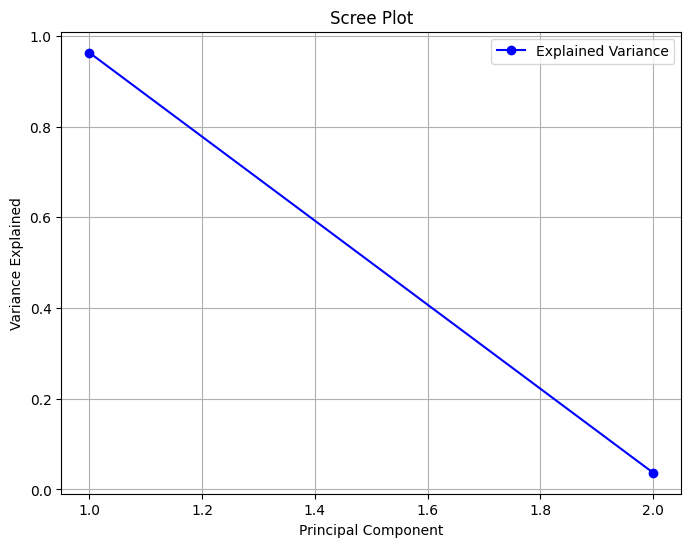

In [68]:
# 2nd method

# A scree plot is a visual tool used in PCA to show the variance explained by each principal component.
# The plot displays each principal component on the x-axis and the proportion of variance it explains on the y-axis.
# This helps in determining the "elbow point" where the variance starts to level off, indicating diminishing returns in the
# additional variance explained by further components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Step 1: Apply PCA to the data (keep all components to view the variance for each)
pca = PCA()
pca.fit(data)

# Step 2: Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 3: Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid()
plt.legend()
plt.show()


PCA Transformation: We fit PCA to the dataset without specifying n_components, so all components are considered.

Extract Variance: explained_variance_ratio_ gives the proportion of the dataset's variance explained by each principal component.

Plotting: Each PC is plotted on the x-axis, with the proportion of variance explained on the y-axis.

Interpreting the Scree Plot:
Look for the "elbow" point, where adding more components provides diminishing returns in variance explained. This point indicates the ideal number of principal components to retain.

# **Visualizing high dimensional data**

In [69]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
path='/content/diabetes.csv'

In [71]:
df=pd.read_csv(path)

In [72]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [73]:
features=df.drop('Outcome',axis=1)
features.head() # we have 8 features

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [74]:
# EDA is skipped

In [75]:
features.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [76]:
# standardize the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(features)
scaled_data=scaler.transform(features)

In [77]:
features=pd.DataFrame(scaled_data,columns=features.columns)

In [78]:
features.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [79]:
features.describe() # mean=0 and SD=1

Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18   1.503427e-17   1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00  -3.572597e+00  -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01  -3.673367e-01  -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01   1.496408e-01   1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01   5.632228e-01   7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00   2.734528e+00   4.921866e+00  6.652839e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean   2.590520e-16              2.451743e-16  1.931325e-16  
std    1.000652e+00              1.000652e+00  1.000652e+00  
min   -4.060474e+00             -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01             -6.889685e-01 -7.862862e-01  
50%    9.419788e-04             -3.001282e-01 -3.608474e-01  
75%    5.847705e-01              4.662269e-01  6.602056e-01  
max    4.455807e+00              5.883565e+00  4.063716e+00

In [80]:
# covariance matrix
features.cov()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.001304  0.129627       0.141466      -0.081778   
Glucose                      0.129627  1.001304       0.152789       0.057403   
BloodPressure                0.141466  0.152789       1.001304       0.207641   
SkinThickness               -0.081778  0.057403       0.207641       1.001304   
Insulin                     -0.073630  0.331789       0.089049       0.437352   
BMI                          0.017706  0.221359       0.282173       0.393085   
DiabetesPedigreeFunction    -0.033566  0.137516       0.041319       0.184167   
Age                          0.545051  0.263858       0.239840      -0.114119   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073630  0.017706                 -0.033566   
Glucose                   0.331789  0.221359                  0.137516   
BloodPressure             0.089049  0.282173                  0.041319   
SkinThickness             0.437352  0.393085                  0.184167   
Insulin                   1.001304  0.198117                  0.185312   
BMI                       0.198117  1.001304                  0.140830   
DiabetesPedigreeFunction  0.185312  0.140830                  1.001304   
Age                      -0.042218  0.036289                  0.033605   

                               Age  
Pregnancies               0.545051  
Glucose                   0.263858  
BloodPressure             0.239840  
SkinThickness            -0.114119  
Insulin                  -0.042218  
BMI                       0.036289  
DiabetesPedigreeFunction  0.033605  
Age                       1.001304

In [81]:
# calculate eigen vectors and values
eigen_values,eigen_vectors=np.linalg.eig(features.cov())

In [82]:
eigen_vectors # columns are eigen vectors

array([[-0.1284321 , -0.59378583, -0.58879003,  0.11784098, -0.19359817,
         0.47560573, -0.08069115,  0.01308692],
       [-0.39308257, -0.17402908, -0.06015291,  0.45035526, -0.09416176,
        -0.46632804,  0.40432871, -0.46792282],
       [-0.36000261, -0.18389207, -0.19211793, -0.01129554,  0.6341159 ,
        -0.32795306, -0.05598649,  0.53549442],
       [-0.43982428,  0.33196534,  0.28221253,  0.5662838 , -0.00958944,
         0.48786206, -0.03797608,  0.2376738 ],
       [-0.43502617,  0.25078106, -0.13200992, -0.54862138,  0.27065061,
         0.34693481,  0.34994376, -0.33670893],
       [-0.45194134,  0.1009598 , -0.03536644, -0.34151764, -0.68537218,
        -0.25320376, -0.05364595,  0.36186463],
       [-0.27061144,  0.122069  , -0.08609107, -0.00825873,  0.08578409,
        -0.11981049, -0.8336801 , -0.43318905],
       [-0.19802707, -0.62058853,  0.71208542, -0.21166198,  0.03335717,
         0.10928996, -0.0712006 , -0.07524755]])

In [83]:
eigen_values # features

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [84]:
# PCs
PC1=features @ eigen_vectors[:,0]
PC2=features @ eigen_vectors[:,1]
PC3=features @ eigen_vectors[:,7]

In [85]:
PC1,PC2,PC3

(0     -1.068503
 1      1.121683
 2      0.396477
 3      1.115781
 4     -2.359334
          ...   
 763   -1.562085
 764    0.100405
 765    0.283475
 766    1.060324
 767    0.839892
 Length: 768, dtype: float64,
 0     -1.234895
 1      0.733852
 2     -1.595876
 3      1.271241
 4      2.184819
          ...   
 763   -1.923150
 764    0.614181
 765   -0.097065
 766   -0.837062
 767    1.151755
 Length: 768, dtype: float64,
 0     -0.095930
 1      0.712938
 2     -1.760678
 3      0.663729
 4     -2.963107
          ...   
 763    0.867408
 764    0.764353
 765    0.077192
 766   -0.425030
 767    1.009178
 Length: 768, dtype: float64)

### Let's Implement the same from PCA lib

In [86]:
# import PCA lib
from sklearn.decomposition import PCA
pca1=PCA(n_components=3) # 3D (PC1, PC2 and PC3)
pca_features=pca1.fit_transform(features)

In [87]:
pca_features # 3D data

array([[ 1.06850273,  1.23489499, -0.09592984],
       [-1.12168331, -0.73385167,  0.71293816],
       [-0.39647671,  1.59587594, -1.76067844],
       ...,
       [-0.28347525,  0.09706503,  0.07719194],
       [-1.06032431,  0.83706234, -0.42503045],
       [-0.83989172, -1.15175485,  1.00917817]])

In [90]:
pca1.components_ # eigen vectors

array([[ 0.1284321 ,  0.39308257,  0.36000261,  0.43982428,  0.43502617,
         0.45194134,  0.27061144,  0.19802707],
       [ 0.59378583,  0.17402908,  0.18389207, -0.33196534, -0.25078106,
        -0.1009598 , -0.122069  ,  0.62058853],
       [ 0.01308692, -0.46792282,  0.53549442,  0.2376738 , -0.33670893,
         0.36186463, -0.43318905, -0.07524755]])

In [91]:
df_new=pd.DataFrame(pca_features,columns=['PC1','PC2','PC3'])

In [92]:
df_new.head()

PC1       PC2       PC3
0  1.068503  1.234895 -0.095930
1 -1.121683 -0.733852  0.712938
2 -0.396477  1.595876 -1.760678
3 -1.115781 -1.271241  0.663729
4  2.359334 -2.184819 -2.963107

In [93]:
# check the variance

explained_variance_ratio=pca1.explained_variance_ratio_
explained_variance_ratio

array([0.26179749, 0.21640127, 0.12870373])

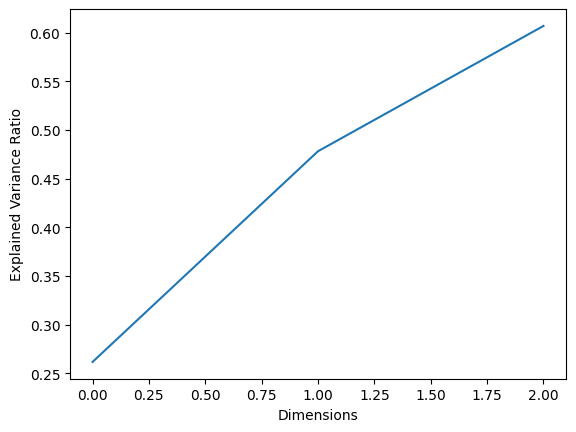

In [95]:
# scree plot

import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.show()